In [1]:
import torch
import matplotlib.pyplot as plt
import pathlib
from ruamel import yaml

from wavebench.dataloaders.rtc_loader import get_dataloaders_rtc_thick_lines
from wavebench import wavebench_path
from wavebench.nn.pl_model_wrapper import LitModel

In [2]:
task = 'rtc'
medium = 'gaussian_lens'
model = 'unet'
version = 1
model_save_dir = f'{wavebench_path}/saved_models/{task}_{medium}/{model}/version_{version}/'

checkpoint = list(pathlib.Path(f'{model_save_dir}/checkpoints').glob('*.ckpt'))[0]

print(checkpoint)

/home/liu0003/Desktop/projects/wavebench/saved_models/rtc_gaussian_lens/unet/version_1/checkpoints/epoch=14-step=1875.ckpt


In [7]:
# net =  LitModel.load_from_checkpoint(
#   checkpoint_path=checkpoint).cpu().eval().model

In [8]:
from wavebench.nn.unet import UNet
net = UNet(1, 1, 1).cpu().eval()

In [9]:
if task == 'rtc':
    loaders = get_dataloaders_rtc_thick_lines(
    medium_type=medium)


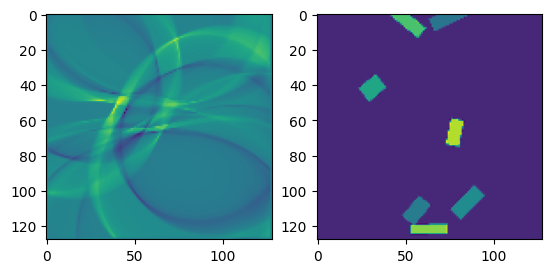

In [10]:
idx = 1
a, b = loaders['train'].dataset.__getitem__(idx)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(a.squeeze().numpy())
axes[1].imshow(b.squeeze().numpy())#'gaussian_lens'


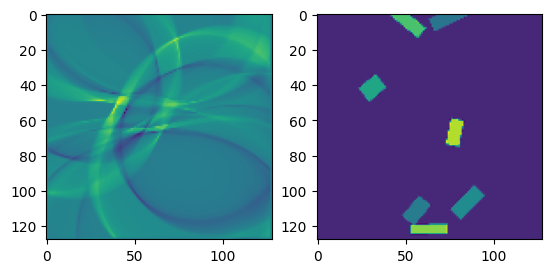

In [11]:
idx = 1
a, b = loaders['train'].dataset.__getitem__(idx)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(a.squeeze().numpy())
axes[1].imshow(b.squeeze().numpy())#'gaussian_lens'


In [20]:
loaders['train'].dataset.__getitem__(3999)

(tensor([[[ 6.2556e-05,  2.4645e-05,  1.7413e-05,  ..., -1.4939e-03,
           -1.4463e-03, -9.7095e-05],
          [ 3.6535e-03,  3.0088e-03,  2.3188e-03,  ..., -5.9667e-03,
           -6.1170e-03,  4.0010e-04],
          [ 1.4864e-02,  1.5033e-02,  1.4136e-02,  ..., -6.5026e-03,
           -6.9982e-03, -2.3763e-03],
          ...,
          [-4.1404e-03, -1.2663e-03, -6.9640e-03,  ...,  1.4344e-01,
            1.4410e-01,  9.2224e-02],
          [-6.3323e-03,  6.0516e-03, -2.6704e-03,  ...,  8.0544e-02,
            7.2163e-02,  3.3204e-02],
          [ 2.0300e-04,  1.2458e-03, -7.4835e-04,  ...,  9.3660e-03,
            8.7572e-03,  3.5036e-03]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]))

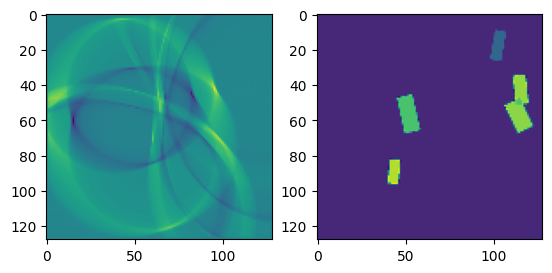

In [12]:
idx = 190
a, b = loaders['test'].dataset.__getitem__(idx)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(a.squeeze().numpy())
axes[1].imshow(b.squeeze().numpy())#'gaussian_lens'


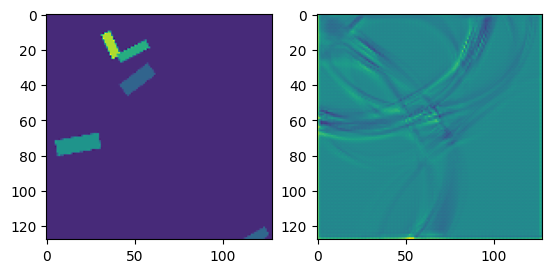

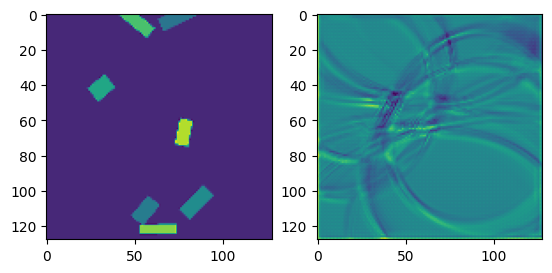

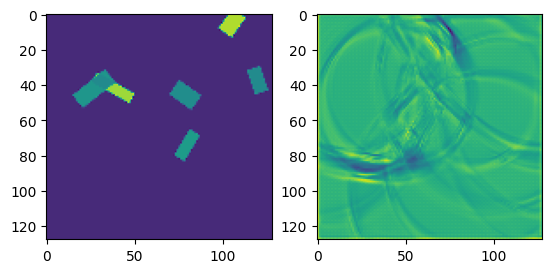

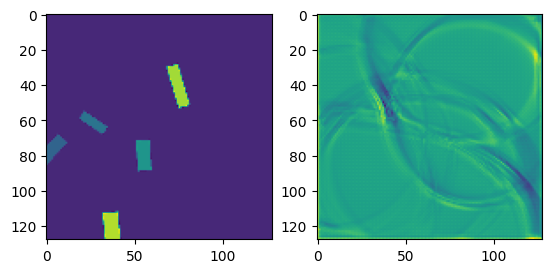

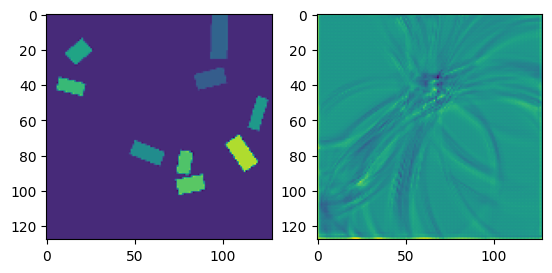

In [13]:
for idx in range(5):
  a, b = loaders['train'].dataset.__getitem__(idx)
  with torch.no_grad():
    out = net(a.unsqueeze(0)).detach().cpu()

  fig, axes = plt.subplots(1, 2)

  axes[0].imshow(b.squeeze().numpy())#'gaussian_lens'
  axes[1].imshow(out.squeeze().numpy())#'gaussian_lens'


In [15]:
out

tensor([[[[-0.0354, -0.0366, -0.0369,  ..., -0.0372, -0.0364, -0.0366],
          [-0.0337, -0.0353, -0.0359,  ..., -0.0354, -0.0350, -0.0359],
          [-0.0339, -0.0358, -0.0363,  ..., -0.0362, -0.0354, -0.0366],
          ...,
          [-0.0335, -0.0352, -0.0355,  ..., -0.0360, -0.0352, -0.0362],
          [-0.0336, -0.0354, -0.0358,  ..., -0.0365, -0.0363, -0.0366],
          [-0.0337, -0.0337, -0.0340,  ..., -0.0353, -0.0347, -0.0342]]]])